In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Mounted at /content/drive


In [2]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning Project/Multiple Linear Regression/50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [4]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [3])], remainder = 'passthrough')
X = ct.fit_transform(X)

print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train[:, 3:] = ss.fit_transform(X_train[:, 3:])
X_test[:, 3:] = ss.transform(X_test[:, 3:])

In [7]:
LR = LinearRegression()
LR.fit(X_train, Y_train)
Y_pred = LR.predict(X_test)

In [8]:
print(Y_test, Y_pred)

[103282.38 144259.4  146121.95  77798.83 191050.39 105008.31  81229.06
  97483.56 110352.25 166187.94] [103015.20159795 132582.27760816 132447.73845175  71976.09851258
 178537.48221057 116161.24230167  67851.69209676  98791.73374687
 113969.43533014 167921.06569552]


## Analysis of the predictions


In [9]:
#see Y_test containing numbers of precision 2. (After decimal value 2 numbers in fractional part)
y_pred  = np.set_printoptions(precision = 2)
print(Y_pred)

[103015.2  132582.28 132447.74  71976.1  178537.48 116161.24  67851.69
  98791.73 113969.44 167921.07]


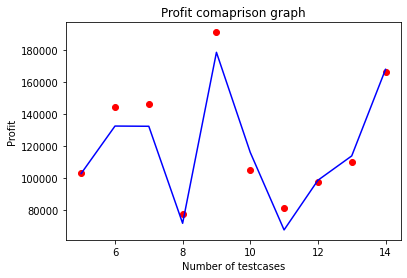

In [16]:
plt.scatter(np.arange(5,15,1), Y_test, color = 'red')
plt.plot(np.arange(5,15,1), Y_pred, color = 'blue')
plt.xlabel("Number of testcases")
plt.ylabel("Profit")
plt.title("Profit comaprison graph")
plt.show()

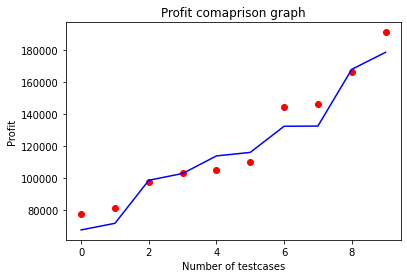

In [17]:
plt.scatter(range(10), np.sort(Y_test), color = "red")
plt.plot(range(10), np.sort(Y_pred), color = "blue")
plt.xlabel("Number of testcases")
plt.ylabel("Profit")
plt.title("Profit comaprison graph")
plt.show()

In [18]:
print(Y_pred, Y_test)

[103015.2  132582.28 132447.74  71976.1  178537.48 116161.24  67851.69
  98791.73 113969.44 167921.07] [103282.38 144259.4  146121.95  77798.83 191050.39 105008.31  81229.06
  97483.56 110352.25 166187.94]


In [19]:
Y_compare = np.concatenate((Y_test.reshape(len(Y_test), 1), Y_pred.reshape(len(Y_pred), 1)), axis = 1)
print(Y_compare)

[[103282.38 103015.2 ]
 [144259.4  132582.28]
 [146121.95 132447.74]
 [ 77798.83  71976.1 ]
 [191050.39 178537.48]
 [105008.31 116161.24]
 [ 81229.06  67851.69]
 [ 97483.56  98791.73]
 [110352.25 113969.44]
 [166187.94 167921.07]]


In [23]:
Y_compare = Y_compare[Y_compare[:,0].argsort()]
print(Y_compare)

[[ 77798.83  71976.1 ]
 [ 81229.06  67851.69]
 [ 97483.56  98791.73]
 [103282.38 103015.2 ]
 [105008.31 116161.24]
 [110352.25 113969.44]
 [144259.4  132582.28]
 [146121.95 132447.74]
 [166187.94 167921.07]
 [191050.39 178537.48]]


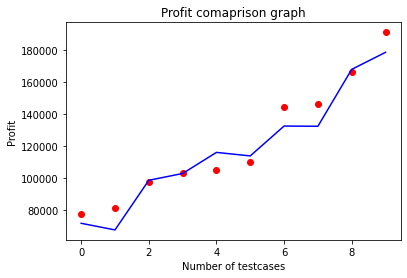

In [24]:
plt.scatter(range(10), Y_compare[:,0], color = "red")
plt.plot(range(10), Y_compare[:,1], color = "blue")
plt.xlabel("Number of testcases")
plt.ylabel("Profit")
plt.title("Profit comaprison graph")
plt.show()

In [25]:
print(LR.intercept_)
print(LR.coef_)

42467.52924853204
[ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]
